# D209 Data Mining I Performance Assessment, Task \# 2

Submitted by William J Townsend, Student ID 003397146, for WGU's MSDA program

## Table of Contents
<ul>
<li><a href="#PartA1">A1: Research Question</a></li>
<li><a href="#PartA2">A2: Objectives and Goals of Analysis</a></li>
<li><a href="#PartB1">B1: Justification of Classification Method</a></li>
<li><a href="#PartB2">B2: Assumptions of a Logistic Regression Model</a></li>
<li><a href="#PartB3">B3: Benefits of Chosen Tools</a></li> 
<li><a href="#PartC1">C1: Data Preparation Goals and Necessary Manipulation</a></li>
<li><a href="#PartC2">C2: Variable Selection & Identification</a></li>
<li><a href="#PartC3">C3: Preparation of Data</a></li>
<li><a href="#PartC4">C4: Copy of Prepared Data Set</a></li>
<li><a href="#PartD1">D1: Data Splitting, Copy of Split Data</a></li>
<li><a href="#PartD2">D2: Analysis Description</a></li>
<li><a href="#PartD3">D3: Classification Analaysis Code</a></li>
<li><a href="#PartE1">E1: Accuracy of Classification Model</a></li> 
<li><a href="#PartE2">E2: Model Results</a></li> 
<li><a href="#PartE3">E3: Classification Limitations</a></li>
<li><a href="#PartE4">E4: Recommended Action</a></li>
<li><a href="#PartF">F: Panopto Recording</a></li>
<li><a href="#PartG">G: Code References</a></li>
<li><a href="#PartH">H: Source References</a></li>    
</ul>

<a id='PartA1'></a>
## A1: Research Question

The research question that I want to examine is, "Can a decision tree model using a boost method be used to identify patients with chronic back pain from the provided data?" In D208 Task 2 (Logistic Regression) and D209 Task 1 (K-Nearest Neighbors Classification, or KNN) I attempted very similar research questions, attempting to generate models to correctly identify or predict patients to have diagnosed chronic back pain. As such, this project will be borrowing heavily from my submission for both of these Performance Assessments, especially in the area of data preparation. 

<a id="#PartA2"></a>
## A2: Objectives and Goals of Analysis

As mentioned, I've attempted to look for a way to predict back pain diagnoses in my prior two Performance Assessments. I've been frustrated with the results, but with D209 Task 2 providing me another option for a classification model by using decision trees, I personally wanted to see if I couldn't improve on that prior work to develop something better. The goal of this analysis is to build a prediction model that exceeds the prior models, with an accuracy of 0.58 and an AUC (Area Under the Curve) score of 0.52. This is a worthwhile business goal for the hospital system because identification of patients with or likely to have chronic back pain offers insight into the individual's healthcare situation, including managing their current health issues and mitigating risks for new issues. The management of those current issues or mitigation of potential future issues is precisely the business of the hospital, and proactive and effective management of those concerns can help lead to better outcomes for currently hospitalized patients, while preventing tomorrow's issues, such as a patient's current hospitalization being extended, being re-hospitalized for the same issue, or even avoiding a future hospitalization for a potential complication or health risk which was avoided.

<a id="#PartB1"></a>
## B1: Justification of Classification Method

A decision tree works by creating a tree which consists of nodes that ask a question of the data needing to be labelled, where that question has only two possible answers. Based on the answer to that question, the data then follows a path down the tree to either the right or left to a new node, which asks another question and then again routes the datapoint to the left or right again. This process continues until an ending is reached, called a leaf, which applies a label based upon how the questions were answered. In this case, we're asking a series of questions like "is this datapoints age greater than the mean age of the dataset?", and when we get to the end of the decision tree and reach a leaf, that leaf will provide a prediction of either 0 (patient does not have chronic back pain) or 1 (patient does have chronic back pain). 

A decision tree provides another means to classify data into one label or another, much like KNN classification did in my prior project. Decision trees can fit the data more effectively than a linear model may, because a plot of all of the data involved can contain multiple decision-regions labelled as either "1" or "0". As it relates to KNN, a decision tree does not need to be scaled, is not sensitive to outliers, and can handle imbalanced data [(Milena Afeworki @ Towards Data Science, 2021)](https://milena-pa.medium.com/a-comparison-of-machine-learning-algorithms-knn-vs-decision-trees-d6110e08bfea). The decision tree provides an alternative classification model that does not depend upon clustering in the same way as KNN, so it may provide different results. Especially with the ability to boost my decision tree using a method such as Adaboost, an opportunity exists to generate several models, with each one getting to learn from its predecessors. If there is any possibility to perform this classification task that I've been working on for several projects now, I'm hopeful that a boosted decision tree will be able to do so. 

<a id="#PartB2"></a>
## B2: Assumptions of a Decision Tree

Decision trees make relatively few assumptions about their data, compared to other predictive models. However, decision trees do make an implicit assumption that simple relationships exist amongst the explanatory and response variables, rather than complex ones. The step-wise nature of a decision tree's work to analyze a datapoint, working downward through nodes at which only two possibilities exist (left or right) means that there are complex relationships between variables that a decision tree cannot learn or account for. 

<a id="#PartB3"></a>
## B3: Benefits of Chosen Tools

I will be using Python throughout this analysis project. Python is a programming language that supports data science processes very well, particularly in the use of packages designed specifically for this. Python also happens to be the only programming language that I know to any sort of significant degree. I'll also be using several Python packages to perform this analysis:
- pandas allows for the handling of the dataset in something like a large table or spreadsheet
  - pandas' CategoricalDtype lets me create columns which are categorical *and* ordinal in nature
- NumPy allows for performing certain mathematical operations or assignment of certain values within the dataset
- Seaborn and MatPlotLib provide graphing functionality
- sklearn also provides several functions that are required components for this analysis
  - The train_test_split function allows us to easily break up our dataset into training and testing portions
  - DecisionTreeClassifier is the basis of this model, which we will use to classify patients into 1 (back pain) or 0 (none)
  - AdaBoostClassifier is an ensemble method to improve classifier performance
  - GridSearchCV will be used for hyperparameter tuning of the DecisionTreeClassifier
  - The confusion_matrix function will let me print a confusion matrix for the classification model
  - roc_auc_score function will compute the Area Under the Curve (AUC) score for the classification model
  - roc_curve will allow for plotting the Receiver Operating Characteristic (ROC) curve of the classification model
  - classification_report provides an easy summary report of the metrics for the classification model
  - accuracy_score gives an easy way to calculate the accuracy of our model
  - mean_squared_error is another method for evaluating our model, and it is required by the rubric

In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
from sklearn.metrics import mean_squared_error

# The CSV's first column is an index and Pandas will duplicate this and create an column without 'index_col=0'
df = pd.read_csv('./medical_clean.csv', index_col=0)
# Check data types and number of values, as well as overall size of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Mari

In [2]:
# Visually inspect dataframe to facilitate exploration, spot problems
pd.set_option("display.max_columns", None)
df.head(5)

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


<a id="#PartC1"></a>
## C1: Data Preparation Goals and Necessary Manipulation

While there are several data preparation and cleaning steps that are going to be necessary here, one of them that will have to be performed for decision tree classification is one hot encoding. One hot encoding represents categorical data by placing it into columns with integer values of 1 or 0 to communicate the same information in a numeric fashion. For example, the gender column contains values for Female, Male, and Nonbinary. Two columns can be created which will actually communicate the same information. If a 1 appears in the first column, then the patient is male. If a 1 appears in the second column, then the patient is nonbinary. If a 1 appears in neither column (both 0), then the patient is female. This can easily be done by using pandas' `get_dummies()` function. 

The decision tree classification method actually requires less data preparation than some of my previous efforts, because it does not require normalization of the data. 

<a id="#PartC2"></a>
## C2: Variable Selection \& Identification

I will exclude the data regarding certain census data, as well as the survey opinions of patients, because these are not types of healthcare data. I intend to include the following features in my analysis:

- Categorical: Area (Rural, Suburban, Urban)
- Continuous: Number of Children
- Continuous: Age
- Categorical: Gender
- Categorical: Readmission
- Continuous: Vitamin D levels
- Continuous: Number of Dr Visits
- Continuous: Full meals
- Continuous: Number of Vitamin D supplements
- Categorical: Soft Drink Consumption
- Categorical: Initial Admission Reason (Observation, Elective, Emergency)
- Categorical: High Blood Pressure
- Categorical: Stroke
- Categorical: Complication Risk (Low, Medium, High)
- Categorical: Overweight
- Categorical: Categorical: Arthritis
- Categorical: Diabetes
- Categorical: Hyperlipidemia
- Categorical: Anxiety
- Categorical: Allergic Rhinitis
- Categorical: Asthma
- Categorical: Days hospitalized
- Continuous: Average daily charge
- Continuous: Additional average daily charge

<a id="#PartC3"></a>
## C3: Preparation of Data

In my previous KNN analysis, I explored the data to make sure there were no outliers which might interfere with the classification model. Decision tree classification does not require normalization and it is not sensitive to outliers, so there is no similar concern. As this exploration step is not necessary for the classification nor required by the rubric, I've declined to do so here. 

In [3]:
# Convert column to string from int, then front-fill string with 0's to reach 5 chars
df['Zip'] = df['Zip'].astype("str").str.zfill(5)
# Convert column to category from string
df["Area"] = df["Area"].astype("category")
# Replace city-specific values with time-zone specific values
df.TimeZone.replace({
    # Puerto Rico does not observe DST, stays on Atlantic Standard Time all year long
    "America/Puerto_Rico" : "US - Puerto Rico",
    # US - Eastern observes DST
    "America/New_York": "US - Eastern",
    "America/Detroit" : "US - Eastern",
    "America/Indiana/Indianapolis" : "US - Eastern",
    "America/Indiana/Vevay" : "US - Eastern",
    "America/Indiana/Vincennes" : "US - Eastern",
    "America/Kentucky/Louisville" : "US - Eastern",
    "America/Toronto" : "US - Eastern",
    "America/Indiana/Marengo" : "US - Eastern",
    "America/Indiana/Winamac" : "US - Eastern",
    # US - Central observes DST
    "America/Chicago" : "US - Central", 
    "America/Menominee" : "US - Central",
    "America/Indiana/Knox" : "US - Central",
    "America/Indiana/Tell_City" : "US - Central",
    "America/North_Dakota/Beulah" : "US - Central",
    "America/North_Dakota/New_Salem" : "US - Central",
    # US - Mountain observes DST
    "America/Denver" : "US - Mountain",
    "America/Boise" : "US - Mountain",
    # Arizona does not observe DST, stays on Mountain Standard Time all year long
    "America/Phoenix" : "US - Arizona",
    # US - Pacific observes DST
    "America/Los_Angeles" : "US - Pacific",
    # US - Alaskan observes DST
    "America/Nome" : "US - Alaskan",
    "America/Anchorage" : "US - Alaskan",
    "America/Sitka" : "US - Alaskan",
    "America/Yakutat" : "US - Alaskan",
    # US - Aleutian observes DST
    "America/Adak" : "US - Aleutian",
    # US - Hawaiian does not observe DST, stays on Hawaii Standard Time all year
    "Pacific/Honolulu" : "US - Hawaiian" 
    }, inplace=True)
# Convert column to category from string
df["TimeZone"] = df["TimeZone"].astype("category")
# Reformat column representing currency in USD to 3 decimal places from 6
df["Income"] = df["Income"].astype(int)
# Convert column to category from string
df["Marital"] = df["Marital"].astype("category")
# Convert column to category from string
df["Gender"] = df["Gender"].astype("category")
# Recast object > boolean wants to turn everything True, need to map Yes/No to True/False
bool_mapping = {"Yes" : 1, "No" : 0}
# Convert column to boolean from string
df["ReAdmis"] = df["ReAdmis"].map(bool_mapping)
# Convert column to boolean from string
df["Soft_drink"] = df["Soft_drink"].map(bool_mapping)
# Convert column to category from string
df["Initial_admin"] = df["Initial_admin"].astype("category")
# Convert column to boolean from string
df["HighBlood"] = df["HighBlood"].map(bool_mapping)
# Convert column to boolean from string
df["Stroke"] = df["Stroke"].map(bool_mapping)
# Convert column to category from string
df["Complication_risk"] = df["Complication_risk"].astype("category")
# Convert column to boolean from string
df["Overweight"] = df["Overweight"].map(bool_mapping)
# Convert column to boolean from string
df["Arthritis"] = df["Arthritis"].map(bool_mapping)
# Convert column to boolean from string
df["Diabetes"] = df["Diabetes"].map(bool_mapping)
# Convert column to boolean from string
df["Hyperlipidemia"] = df["Hyperlipidemia"].map(bool_mapping)
# Convert column to boolean from string
df["BackPain"] = df["BackPain"].map(bool_mapping)
# Convert column to boolean from string
df["Anxiety"] = df["Anxiety"].map(bool_mapping)
# Convert column to boolean from string
df["Allergic_rhinitis"] = df["Allergic_rhinitis"].map(bool_mapping)
# Convert column to boolean from string
df["Reflux_esophagitis"] = df["Reflux_esophagitis"].map(bool_mapping)
# Convert column to boolean from string
df["Asthma"] = df["Asthma"].map(bool_mapping)
# Convert column to category from string
df["Services"] = df["Services"].astype("category")
# Reformat column representing currency in USD to 3 decimal places from 6
df["TotalCharge"] = df.TotalCharge.round(3)
# Reformat column representing currency in USD to 3 decimal places from 6
df["Additional_charges"] = df.Additional_charges.round(3)
# Establish map for reversing survey questions to reflect a truth where 1 < 8 (currently the reverse)
survey_mapping = {1: 8, 2: 7, 3 : 6, 4: 5, 5: 4, 6: 3, 7 : 2, 8 : 1}
# Establish ordered categorical datatype structure ("1" < "2" < ... < "7" < "8") for survey response columns
survey_scores = CategoricalDtype(categories=["1", "2", "3", "4", "5", "6", "7", "8"], ordered=True)
# Remap column to reflect 1 < 8, rather than 1 > 8
df["Item1"] = df["Item1"].map(survey_mapping)
# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item1"] = df["Item1"].map(str)
# Reassign datatype from strings to created survey_scores datatype 
df["Item1"] = df["Item1"].astype(survey_scores)
# Remap column to reflect 1 < 8, rather than 1 > 8
df["Item2"] = df["Item2"].map(survey_mapping)
# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item2"] = df["Item2"].map(str)
# Reassign datatype from strings to created survey_scores datatype 
df["Item2"] = df["Item2"].astype(survey_scores)
# Remap column to reflect 1 < 8, rather than 1 > 8
df["Item3"] = df["Item3"].map(survey_mapping)
# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item3"] = df["Item3"].map(str)
# Reassign datatype from strings to created survey_scores datatype 
df["Item3"] = df["Item3"].astype(survey_scores)
# Remap column to reflect 1 < 8, rather than 1 > 8
df["Item4"] = df["Item4"].map(survey_mapping)
# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item4"] = df["Item4"].map(str)
# Reassign datatype from strings to created survey_scores datatype 
df["Item4"] = df["Item4"].astype(survey_scores)
# Remap column to reflect 1 < 8, rather than 1 > 8
df["Item5"] = df["Item5"].map(survey_mapping)
# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item5"] = df["Item5"].map(str)
# Reassign datatype from strings to created survey_scores datatype 
df["Item5"] = df["Item5"].astype(survey_scores)
# Remap column to reflect 1 < 8, rather than 1 > 8
df["Item6"] = df["Item6"].map(survey_mapping)
# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item6"] = df["Item6"].map(str)
# Reassign datatype from strings to created survey_scores datatype 
df["Item6"] = df["Item6"].astype(survey_scores)
# Remap column to reflect 1 < 8, rather than 1 > 8
df["Item7"] = df["Item7"].map(survey_mapping)
# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item7"] = df["Item7"].map(str)
# Reassign datatype from strings to created survey_scores datatype 
df["Item7"] = df["Item7"].astype(survey_scores)
# Remap column to reflect 1 < 8, rather than 1 > 8
df["Item8"] = df["Item8"].map(survey_mapping)
# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item8"] = df["Item8"].map(str)
# Reassign datatype from strings to created survey_scores datatype 
df["Item8"] = df["Item8"].astype(survey_scores)
df.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,US - Central,"Psychologist, sport and exercise",1,53,86575,Divorced,Male,0,19.141466,6,0,0,0,Emergency Admission,1,0,Medium,0,1,1,0,1,1,1,0,1,Blood Work,10.585770,3726.703,17939.403,6,6,7,7,5,6,6,5
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,US - Central,Community development worker,3,51,46805,Married,Female,0,18.940352,4,2,1,0,Emergency Admission,1,0,High,1,0,0,0,0,0,0,1,0,Intravenous,15.129562,4193.190,17612.998,6,5,6,5,5,5,6,6
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,US - Central,Chief Executive Officer,3,53,14370,Widowed,Female,0,18.057507,4,1,0,0,Elective Admission,1,0,Medium,1,0,1,0,0,0,0,0,0,Blood Work,4.772177,2434.234,17505.192,7,5,5,5,6,5,6,6
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,US - Central,Early years teacher,0,78,39741,Married,Male,0,16.576858,4,1,0,0,Elective Admission,0,1,Medium,0,1,0,0,0,0,0,1,1,Blood Work,1.714879,2127.830,12993.437,6,4,4,6,5,4,4,4
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,US - Eastern,Health promotion specialist,1,22,1209,Widowed,Female,0,17.439069,5,0,2,1,Elective Admission,0,0,Low,0,0,0,1,0,0,1,0,0,CT Scan,1.254807,2113.073,3716.526,7,8,6,6,4,6,5,6


In [4]:
# Generate column names which are pythonic in syntax and descriptive
pythonic_columns = ["customer_id", "interaction", "uid", "city", "state", "county", 
                    "zip_code", "latitude", "longitude", "population", "area_type", "timezone", "job", "children", 
                    "age", "income", "marital_status", "gender", "readmission", 
                    "vitamin_d_level", "dr_visits", "full_meals", "vit_d_supp", "soft_drink", "initial_admit", 
                    "high_bp", "stroke", "complication_risk", "overweight", "arthritis", "diabetes", "hyperlipidemia", 
                    "back_pain", "anxiety", "allergic_rhinitis", "reflux_esophagitis", "asthma", "services", 
                    "days_hospitalized", "daily_charge", "addl_charge", "surv1_timely_admit", "surv2_timely_treat", 
                    "surv3_timely_visit", "surv4_reliable", "surv5_options", "surv6_hours", "surv7_courteous", 
                    "surv8_dr_listen"]
# Implement new pythonic column headings
df.set_axis(pythonic_columns, axis=1, inplace=True)
# Generate columns of dummy values for dataframe's Area column
area_temp_df = pd.get_dummies(data=df["area_type"], drop_first=True)
# Generate columns of dummy values for dataframe's Gender column
gender_temp_df = pd.get_dummies(data=df["gender"], drop_first=True)
# Generate columns of dummy values for dataframe's Initial_admin column
initial_admit_temp_df = pd.get_dummies(data=df["initial_admit"], drop_first=True)
# Generate columns of dummy values for dataframe's Complication_risk column
comp_risk_temp_df = pd.get_dummies(data=df["complication_risk"], drop_first=True)
# Insert the generated dummy variables to new dataframe, placing them in the same order as the original dataframe
# Dummies for Complication Risk
df.insert(27, "comp_risk_medium", comp_risk_temp_df.Medium)
df.insert(27, "comp_risk_low", comp_risk_temp_df.Low)
# Dummies for Initial Admit
df.insert(24, "initial_admit_emerg", initial_admit_temp_df["Emergency Admission"])
df.insert(24, "initial_admit_observ", initial_admit_temp_df["Observation Admission"])
# Dummies for Gender
df.insert(17, "gender_nonbinary", gender_temp_df.Nonbinary)
df.insert(17, "gender_male", gender_temp_df.Male)
# Dummies for Area
df.insert(10, "area_urban", area_temp_df.Urban)
df.insert(10, "area_suburban", area_temp_df.Suburban)
# Drop undesired columns
df.drop(["customer_id", "interaction", "uid", "city", "state", "county", "zip_code", "latitude", "longitude", "population", "area_type", "timezone", "job", "income", "marital_status", "gender", "initial_admit", "complication_risk", "services", "surv1_timely_admit", "surv2_timely_treat", "surv3_timely_visit", "surv4_reliable", "surv5_options", "surv6_hours", "surv7_courteous", "surv8_dr_listen"], axis=1, inplace=True)
# Check resulting dataframe
df.head()

,area_suburban,area_urban,children,age,gender_male,gender_nonbinary,readmission,vitamin_d_level,dr_visits,full_meals,vit_d_supp,soft_drink,initial_admit_observ,initial_admit_emerg,high_bp,stroke,comp_risk_low,comp_risk_medium,overweight,arthritis,diabetes,hyperlipidemia,back_pain,anxiety,allergic_rhinitis,reflux_esophagitis,asthma,days_hospitalized,daily_charge,addl_charge
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,53,1,0,0,19.141466,6,0,0,0,0,1,1,0,0,1,0,1,1,0,1,1,1,0,1,10.585770,3726.703,17939.403
2,0,1,3,51,0,0,0,18.940352,4,2,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,15.129562,4193.190,17612.998
3,1,0,3,53,0,0,0,18.057507,4,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,4.772177,2434.234,17505.192
4,1,0,0,78,1,0,0,16.576858,4,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,1.714879,2127.830,12993.437
5,0,0,1,22,0,0,0,17.439069,5,0,2,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1.254807,2113.073,3716.526


<a id="#PartC4"></a>
## C4: Copy of Prepared Data Set

A copy of the full and prepared dataset is made and attached to this analysis in a CSV file titled "task2_full_clean". 

In [5]:
# Save dataframe to CSV, ignore index (if included, this will create an additional unnecessary column)
df.to_csv('task2_full_clean.csv', index=False)

<a id="#PartD1"></a>
## D1: Data Splitting, Copy of Split Data

In [6]:
# Separate the X variables (explanatory) from the Y variable (response) into different dataframes
X = df.drop(["back_pain"], axis=1).copy()
y = df["back_pain"].copy()

# Split the data into train and test sets, 80% train, 20% test, use stratify to maintain proportions across split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state = 42, stratify = y)

In [7]:
# Save each of the four data sets to CSV to satisfy rubric
X_train.to_csv('task2_Xtrain.csv', index=False)
X_test.to_csv('task2_Xtest.csv', index=False)
y_train.to_csv('task2_ytrain.csv', index=False)
y_test.to_csv('task2_ytest.csv', index=False)

<a id="#PartD2"></a>
## D2: Analysis Description

To generate a decision tree classification model using the `DecisionTreeClassifier` model, I have to determine the best parameters to use, particularly with the `max_depth` and `min_samples_leaf` fields. Maximum depth describes how many levels I will allow the tree to grow to. Greater depth means greater complexity, but this can also cause overfitting of the model. Minimum samples per leaf dictates how leaf nodes can be split up, requiring a certain portion of samples to be remaining on both the left and right sides of a node. 

In order to do this, I'll instantiate an initial DecisionTreeClassifier, as well as a list of possible values for these parameters. I'll then use a GridSearch to implement this initial decision tree model, testing it with each of the parameters that I've provided. The GridSearch will determine the performance of each possible permutation of the decision tree model, settling on a set of parameters which provide the best performance. I will print the accuracy and AUC score for this model, as a point of reference for further refinement. 

Once the GridSearch has finished tuning the hyperparameters for the model, I will generate a instance of DecisionTreeClassifier, using those parameters. I want to use Adaptive Boosting (AdaBoosting) to further improve the resulting decision tree, but this requires me to create an initial decision tree to use in the first place. Creating the best decision tree possible for this data through hyperparameter tuning will provide a more effective model for AdaBoosting to improve upon. 

In [8]:
# HYPER PARAMETER TUNING FOR DECISION TREE
# Define params_dt
params_dt = {
    'max_depth' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf' : [0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 0.20, 0.22]
}

# Instantiate dt
initial_dt = DecisionTreeClassifier(random_state=42)

# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=initial_dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

# Fit grid search to training model
grid_dt.fit(X_train, y_train)

# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict values for test set
initial_y_pred = best_model.predict(X_test)

# Generate accuracy report for this model
acc_test = accuracy_score(y_test, initial_y_pred)
print('Test set accuracy of best decision tree: {:.2f}'.format(acc_test)) 

# Predict the test set probabilities of the positive class
initial_y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Compute test_roc_auc
initial_roc_auc = roc_auc_score(y_test, initial_y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(initial_roc_auc))

Test set accuracy of best decision tree: 0.59
Test set ROC AUC score: 0.541


In [9]:
best_model

DecisionTreeClassifier(max_depth=8, min_samples_leaf=0.06, random_state=42)

Hyperparameter tuning with `GridSearchCV` reveals that the best performing parameters for my decision tree are a max_depth of 8 and a min_samples_leaf of 0.06. This produces an AUC score of 0.541, which is better than random classification, but not by much. As such, this decision tree seems to be a weak learner. Applying a boosting method, such as Adaptive Boosting (AdaBoost) creates an ensemble of classifiers which can learn from the mistakes of the prior classifiers, to create a more accurate model. 

AdaBoost takes parameters for `n_estimators`, the number of estimators in the ensemble, and `learning_rate`, which is the weight applied to each of those estimators. A tradeoff exists between these two parameters, in that more estimators increase the size, complexity, and performance of the model, and learning rate dictates the weight applied to each of those additional estimators. I'll use hyperparameter tuning with GridSearch CV again to determine the appropriate values for both the number of estimators, and the learning rate to create the most successful model by AUC score.

(Note: I had originally used a wider set of parameters for this portion. This took an unreasonably long time to compute, so I have reduced the range to something that will execute in somehting like 5-7 minutes rather than 20+, to facilitate demonstrating my code in the course of this video.)

In [10]:
# HYPERPARAMETER TUNING FOR ADABOOST
# Define params_ada
params_ada = {
    'n_estimators' : [160, 180, 200],
    'learning_rate' : [0.9, 1.0, 1.1, 1.2, 1.3]
}

# Instantiate tuned decision tree
final_dt = DecisionTreeClassifier(max_depth=8, min_samples_leaf=0.06, random_state=42)

# Instantiate initial adaboost
initial_ada = AdaBoostClassifier(base_estimator=final_dt, random_state=42)

# Instantiate grid_ab
grid_ada = GridSearchCV(estimator=initial_ada,
                       param_grid=params_ada,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

# Fit grid search to training model
grid_ada.fit(X_train, y_train)

# Display the most effective parameters
print(grid_ada.best_params_)

{'learning_rate': 1.2, 'n_estimators': 200}


GridSearchCV returns that the best parameters for AdaBoost are 200 estimators with a learning rate of 1.2. Using the parameters that we've established for the decision tree and for the adaptive boosting, we can now use both of these to develop the final model. 

In [11]:
# FINAL TUNED MODEL
# Instantiate dt
final_dt = DecisionTreeClassifier(max_depth=8, min_samples_leaf=0.06, random_state=42)

# Instantiate ada
final_ada = AdaBoostClassifier(base_estimator=final_dt, n_estimators=200, learning_rate = 1.2, random_state=42)

# Fit ada to the training set
final_ada.fit(X_train, y_train)

# Predict test set labels
final_y_pred = final_ada.predict(X_test)

# Evaluate acc_test
final_acc_test = accuracy_score(y_test, final_y_pred)
print('Test set accuracy of final decision tree model: {:.2f}'.format(final_acc_test)) 

# Compute the probabilities of obtaining the positive class
final_y_pred_proba = final_ada.predict_proba(X_test)[:,1]

# Evaluate test-set roc_auc_score
final_roc_auc = roc_auc_score(y_test, final_y_pred_proba)

# Generate Confusion Matrix
final_matrix = confusion_matrix(y_test, final_y_pred)
print("\nThe confusion matrix for this AdaBoosted Decision Tree model:")
print("Predicted No Back Pain | Predicted Back Pain")
print(f"                   {final_matrix[0]} Actual No Back Pain")
print(f"                   {final_matrix[1]} Actual Back Pain\n")

# Generate mean_squared_error and root mean squared error
mse = mean_squared_error(y_test, final_y_pred)
root_mse = mse**(1/2)
print(f"The mean squared error of this model is: {mse}")
print(f"The root mean squared error of this model is: {round(root_mse, 2)}\n\n")

# Generate classification report
print(classification_report(y_test, final_y_pred))

print('\nThe Area Under the Curve (AUC) score of the final decision tree model is: {:.2f}'.format(final_roc_auc))

Test set accuracy of final decision tree model: 0.74

The confusion matrix for this AdaBoosted Decision Tree model:
Predicted No Back Pain | Predicted Back Pain
                   [954 223] Actual No Back Pain
                   [297 526] Actual Back Pain

The mean squared error of this model is: 0.26
The root mean squared error of this model is: 0.51


              precision    recall  f1-score   support

           0       0.76      0.81      0.79      1177
           1       0.70      0.64      0.67       823

    accuracy                           0.74      2000
   macro avg       0.73      0.72      0.73      2000
weighted avg       0.74      0.74      0.74      2000


The Area Under the Curve (AUC) score of the final decision tree model is: 0.80


This final tuned and boosted model provides a much better accuracy (0.74) and AUC score (0.80) than the original decision tree did. The result is a classification model that is much more effective than the models that I'd previously generated. 

<a id="#PartD3"></a>
## D3: Classification Analysis Code

All of the code that was just performed above is replicated here, because the rubric requires this section to exist:

In [12]:
# HYPER PARAMETER TUNING FOR DECISION TREE
# Define params_dt
params_dt = {
    'max_depth' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf' : [0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 0.20, 0.22]
}

# Instantiate dt
initial_dt = DecisionTreeClassifier(random_state=42)

# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=initial_dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

# Fit grid search to training model
grid_dt.fit(X_train, y_train)

# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict values for test set
initial_y_pred = best_model.predict(X_test)

# Generate accuracy report for this model
acc_test = accuracy_score(y_test, initial_y_pred)
print('Test set accuracy of best decision tree: {:.2f}'.format(acc_test)) 

# Predict the test set probabilities of the positive class
initial_y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Compute test_roc_auc
initial_roc_auc = roc_auc_score(y_test, initial_y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(initial_roc_auc))

Test set accuracy of best decision tree: 0.59
Test set ROC AUC score: 0.541


In [13]:
# HYPERPARAMETER TUNING FOR ADABOOST
# Define params_ada
params_ada = {
    'n_estimators' : [160, 180, 200],
    'learning_rate' : [0.9, 1.0, 1.1, 1.2, 1.3]
}

# Instantiate tuned decision tree
final_dt = DecisionTreeClassifier(max_depth=8, min_samples_leaf=0.06, random_state=42)

# Instantiate initial adaboost
initial_ada = AdaBoostClassifier(base_estimator=final_dt, random_state=42)

# Instantiate grid_ab
grid_ada = GridSearchCV(estimator=initial_ada,
                       param_grid=params_ada,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

# Fit grid search to training model
grid_ada.fit(X_train, y_train)

# Display the most effective parameters
print(grid_ada.best_params_)

{'learning_rate': 1.2, 'n_estimators': 200}


In [14]:
# FINAL TUNED MODEL
# Instantiate dt
final_dt = DecisionTreeClassifier(max_depth=8, min_samples_leaf=0.06, random_state=42)

# Instantiate ada
final_ada = AdaBoostClassifier(base_estimator=final_dt, n_estimators=200, learning_rate = 1.2, random_state=42)

# Fit ada to the training set
final_ada.fit(X_train, y_train)

# Predict test set labels
final_y_pred = final_ada.predict(X_test)

# Evaluate acc_test
final_acc_test = accuracy_score(y_test, final_y_pred)
print('Test set accuracy of final decision tree model: {:.2f}'.format(final_acc_test)) 

# Compute the probabilities of obtaining the positive class
final_y_pred_proba = final_ada.predict_proba(X_test)[:,1]

# Evaluate test-set roc_auc_score
final_roc_auc = roc_auc_score(y_test, final_y_pred_proba)

# Generate Confusion Matrix
final_matrix = confusion_matrix(y_test, final_y_pred)
print("\nThe confusion matrix for this AdaBoosted Decision Tree model:")
print("Predicted No Back Pain | Predicted Back Pain")
print(f"                   {final_matrix[0]} Actual No Back Pain")
print(f"                   {final_matrix[1]} Actual Back Pain\n")

# Generate mean_squared_error and root mean squared error
mse = mean_squared_error(y_test, final_y_pred)
root_mse = mse**(1/2)
print(f"The mean squared error of this model is: {mse}")
print(f"The root mean squared error of this model is: {round(root_mse, 2)}\n\n")

# Generate classification report
print(classification_report(y_test, final_y_pred))

print('\nThe Area Under the Curve (AUC) score of the final decision tree model is: {:.2f}'.format(final_roc_auc))

Test set accuracy of final decision tree model: 0.74

The confusion matrix for this AdaBoosted Decision Tree model:
Predicted No Back Pain | Predicted Back Pain
                   [954 223] Actual No Back Pain
                   [297 526] Actual Back Pain

The mean squared error of this model is: 0.26
The root mean squared error of this model is: 0.51


              precision    recall  f1-score   support

           0       0.76      0.81      0.79      1177
           1       0.70      0.64      0.67       823

    accuracy                           0.74      2000
   macro avg       0.73      0.72      0.73      2000
weighted avg       0.74      0.74      0.74      2000


The Area Under the Curve (AUC) score of the final decision tree model is: 0.80


<a id="#PartE1"></a>
## E1: Accuracy of Classification Model

The entire reason that I wanted to construct this model is because the logistic regression model I'd created in D208 and the KNN classification model I'd created in D209 were only accurate to about 58-59%. These models achieved this accuracy by leaning heavily (or entirely) to predicting patients to not have back pain (label = 0), which was accurate for 58.86% of observations in the dataset. As a result, these models lacked precision, having difficulty correctly predicting instances where the patient did have back pain (label = 1). 

This model was significantly more accurate than the prior models, finishing with an accuracy of 0.74. This is most evident by looking at the confusion matrix. We can see that the model was correct on 1480 (954 + 526) occasions out of 2000 observations in the test set, while being incorrect on 520 (297 + 223). This model was not "afraid" to predict patients to have back pain, unlike my prior two models, and it actually did so at a reasonably effective rate. This model had a precision of 0.70, which is a significant improvement over the KNN classifier's precision of just 0.47. 

The mean squared error (MSE) of this classification model is 0.26. Mean squared error is the average of the square of the errors in the model, errors being the difference between the actual values and the estimated values. A lower MSE is better, at is it indicates that the magnitude of the errors (which it proceeds to square and then average) are smaller in magnitude. It is worth noting, however, that MSE is not a good choice for evaluating a binary classification problem such as this one for two primary reasons, as explained by [Rafay Khan for Towards Data Science](https://towardsdatascience.com/why-using-mean-squared-error-mse-cost-function-for-binary-classification-is-a-bad-idea-933089e90df7). First, an MSE assumes a normal distribution, where a binary dataset is not a normal distribution. Second, an MSE expects inputs from negative infinity to positive infinity, while a binary model outputs only 0 and 1. Despite this, I have provided the mean squared error for this model because the rubric requires it. 

<a id="#PartE2"></a>
## E2: Model Results

As explained above, this model has a much higher accuracy than the prior ones that I created, and it also has a much higher AUC score. A good way to visualize the effectiveness of this model is with a ROC (Receiver Operating Characteristic) curve.

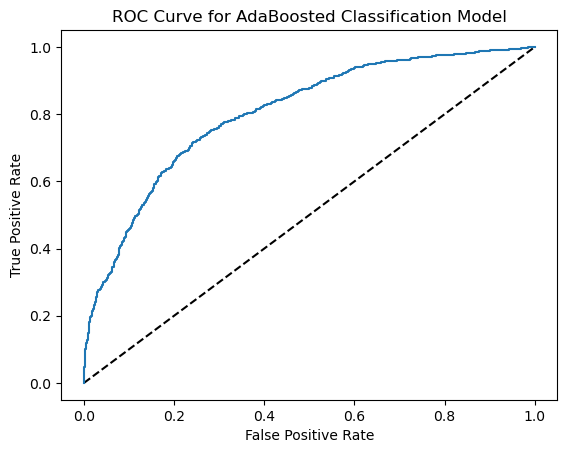

In [15]:
# Generate ROC plot and provide AUC score 
fpr, tpr, thresholds = roc_curve(y_test, final_y_pred_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoosted Classification Model')
plt.show()

On this graph, the center diagonal line represents classification performance if done completely randomly (50%). A classifier's performance can be plotted onto this graph, with a curve below the diagonal reflecting a poor prediction rate (all the way to 0% correct predictions in the bottom right) while a curve above the diagonal reflects a good prediction rate (all the way up to 100% correct predictions in the top left). The Area Under the Curve (AUC) score is the percentage of the graph's area that is beneath the curve created by the classification model, where a perfect (100% correct) model would have an AUC of 1.0 and a completely wrong (0% correct) model would have an AUC of 0.0. This model has an AUC of 0.80. For reference, the KNN model that I created in Task 1 for D209 had an AUC score of only 0.52. 

This model is not perfect, but it is clearly much more effective than completely random classification is. In this regard, this project has met its goal of outperforming the models that preceded it. There is still room for improvement, but this model could provide some use to patients and the hospital system at large.  
 
<a id="#PartE3"></a>
## E3: Classification Limitations

The most important limitation of this analysis is that the 10,000 observations on which the model is built are not really that many, relative to the overall population of people hospitalized in the United States. There is a core assumption to any sort of predictive modeling that the sample is representative of the population, and it is not clear that the data provided here is actually representative of the population. 

This is important, because this model is built upon decision trees, which have used adaptive boosting (AdaBoost) to increase the performance of the model. Decision trees themselves are unstable, because changes in the data values can result in a new tree being constructed, which may lead to different outcomes as each datapoint traverses the tree [(Corporate Finance Institute, 2022)](https://corporatefinanceinstitute.com/resources/data-science/decision-tree/). While this is addressed somewhat through the use of AdaBoosting, AdaBoosting itself requires a quality dataset, which requires avoiding noisy data [(Analytics Vidyha, 2021)](https://www.analyticsvidhya.com/blog/2021/06/adaboost-a-brief-introduction-to-ensemble-learning/). Prior exploration of this dataset in previous classes gave some indications that it was rather noisy, especially because of the data being extremely unfocused between census data, very specific healthcare data, financial data, and surveyed user opinions. A dataset that is larger and cleaner may provide different results.

<a id="#PartE4"></a>
## E4: Recommended Action

I would recommend that this model be used to evaluate patients in the hospital system, to predict if they have chronic back pain. While most patients will be identified correctly as having back pain (or not) when this is (or is not) the case, the group of interest will actually become those patients that the model predicts to have chronic back pain but lack a diagnosis of such. This group (the top right on our confusion matrix) is essentially being predicted to have chronic back pain and does not do so, and the fact that they don't when the model is generally correct may indicate that these patients are at risk of or likely to develop chronic back pain. Identifying these patients as being at-risk for such a malady creates an opportunity for preventative medicine and intervention to avoid or mitigate such an outcome and ensure that someone who "should" be in the chronic back pain group under this model remains out of it. While such interventions do cost more than doing nothing, avoiding such outcomes is likely to save money and other resources in the long run by avoiding necessary care for at-risk patients who later developing chronic back pain. As the adage goes, "an ounce of prevention is worth a pound of cure". 

<a id="#PartF"></a>
## F: Panopto Recording

My presentation of this performance assessment [can be viewed here, via Panopto.](https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=45c9fcbc-e6e6-448d-9086-af6600016eba)

<a id="#PartG"></a>
## G: Code References

[William Townsend D208 Task 2 Performance Assessment Submission](https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=9ac55b7b-f61e-46da-bc56-af5c0034f1d7) and [William Townsend D209 Task 1 Performance Assessment Submission](https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=f273f038-af83-4566-8331-af60017c5ba8) were used for the code to clean up and prepare the dataset. The results of both (accuracy scores, etc.) were also referred to as a point of comparison in this analysis. 

<a id="#PartH"></a>
## H: Source References

[(Milena Afeworki @ Towards Data Science, 2021)](https://milena-pa.medium.com/a-comparison-of-machine-learning-algorithms-knn-vs-decision-trees-d6110e08bfea) was used for rationale on using the Decision Tree over the KNN classifier from D209 Task 1. 

[Rafay Khan @ Towards Data Science, 2019](https://towardsdatascience.com/why-using-mean-squared-error-mse-cost-function-for-binary-classification-is-a-bad-idea-933089e90df7) was used for addressing why mean squared error is a poor choice for evaluating binary classification models. 

[(Corporate Finance Institute, 2022)](https://corporatefinanceinstitute.com/resources/data-science/decision-tree/) was used for discussion of the limitations of decision trees, as it pertains to this analysis.

[(Analytics Vidyha, 2021)](https://www.analyticsvidhya.com/blog/2021/06/adaboost-a-brief-introduction-to-ensemble-learning/) was used for discussion of the limitations of Adaboosting, as it pertains to this analysis.